In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

## 한글 사용을 위한 페키지##
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False

import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.width', 1000)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [2]:
Korean = [90,95, 85, 80, 75, 80, 75, 70, 65, 65]
English = [95, 90, 85, 80, 85, 70, 70, 60, 65, 55]
Math = [95, 85, 80, 70, 60, 70, 85, 80, 95, 45]

scores = pd.DataFrame({'korean': Korean, 'english': English, 'math': Math})

scores.describe()

,korean,english,math
count,10.000000,10.000000,10.0000
mean,78.000000,75.500000,76.5000
std,10.055402,13.426756,15.6436
min,65.000000,55.000000,45.0000
25%,71.250000,66.250000,70.0000
50%,77.500000,75.000000,80.0000
75%,83.750000,85.000000,85.0000
max,95.000000,95.000000,95.0000


In [3]:
print(scores.corr())

           korean   english      math
korean   1.000000  0.872354  0.374367
english  0.872354  1.000000  0.379552
math     0.374367  0.379552  1.000000


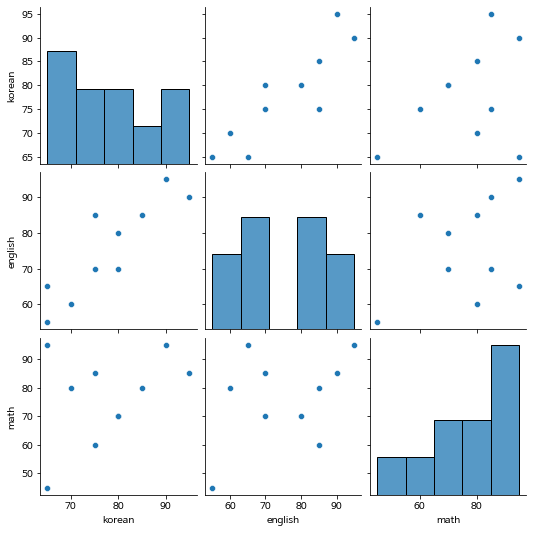

In [4]:
sns.pairplot(data=scores)
plt.show()

In [5]:
from google.colab import drive
drive.mount('/content/drive')
whr = pd.read_csv('/content/drive/MyDrive/whr_2022.csv')
data = whr.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        146 non-null    int64  
 1   Country                                     146 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

In [7]:
data2 = data.drop(['Whisker-high', 'Whisker-low'], axis = 1)
data2.columns = ['rank', 'country', 'happy_score', 'residual', 'gdp', 'social_support', 'health', 'freedom', 'generosity', 'trust']
print(data2)

     rank      country  happy_score  residual    gdp  social_support  health  freedom  generosity  trust
0       1      Finland        7.821     2.518  1.892           1.258   0.775    0.736       0.109  0.534
1       2      Denmark        7.636     2.226  1.953           1.243   0.777    0.719       0.188  0.532
2       3      Iceland        7.557     2.320  1.936           1.320   0.803    0.718       0.270  0.191
3       4  Switzerland        7.512     2.153  2.026           1.226   0.822    0.677       0.147  0.461
4       5  Netherlands        7.415     2.137  1.945           1.206   0.787    0.651       0.271  0.419
..    ...          ...          ...       ...    ...             ...     ...      ...         ...    ...
141   142    Botswana*        3.471     0.187  1.503           0.815   0.280    0.571       0.012  0.102
142   143      Rwanda*        3.268     0.536  0.785           0.133   0.462    0.621       0.187  0.544
143   144     Zimbabwe        2.995     0.548  0.947   

In [8]:
print(data2.duplicated().sum())
print(data2.isnull().sum())

0
rank              0
country           0
happy_score       0
residual          0
gdp               0
social_support    0
health            0
freedom           0
generosity        0
trust             0
dtype: int64


In [9]:
data3 = data2.sort_values('happy_score', ascending=False)
print(data3.head(10))
print()

print(data3.tail(10))

   rank      country  happy_score  residual    gdp  social_support  health  freedom  generosity  trust
0     1      Finland        7.821     2.518  1.892           1.258   0.775    0.736       0.109  0.534
1     2      Denmark        7.636     2.226  1.953           1.243   0.777    0.719       0.188  0.532
2     3      Iceland        7.557     2.320  1.936           1.320   0.803    0.718       0.270  0.191
3     4  Switzerland        7.512     2.153  2.026           1.226   0.822    0.677       0.147  0.461
4     5  Netherlands        7.415     2.137  1.945           1.206   0.787    0.651       0.271  0.419
5     6  Luxembourg*        7.404     2.042  2.209           1.155   0.790    0.700       0.120  0.388
6     7       Sweden        7.384     2.003  1.920           1.204   0.803    0.724       0.218  0.512
7     8       Norway        7.365     1.925  1.997           1.239   0.786    0.728       0.217  0.474
8     9       Israel        7.364     2.634  1.826           1.221   0.81

In [10]:
data3.drop(['rank', 'country'], axis=1, inplace = True)
print(data3.head(10).mean())
print()

print(data3.tail(10).mean())
print()

print(data3.head(10).mean() / data3.tail(10).mean())

happy_score       7.4658
residual          2.1912
gdp               1.9556
social_support    1.2307
health            0.7913
freedom           0.6901
generosity        0.1940
trust             0.4137
dtype: float64

happy_score       3.3391
residual          0.9149
gdp               0.9336
social_support    0.4853
health            0.3324
freedom           0.4010
generosity        0.1345
trust             0.1373
dtype: float64

happy_score       2.235872
residual          2.395016
gdp               2.094687
social_support    2.535957
health            2.380566
freedom           1.720948
generosity        1.442379
trust             3.013110
dtype: float64


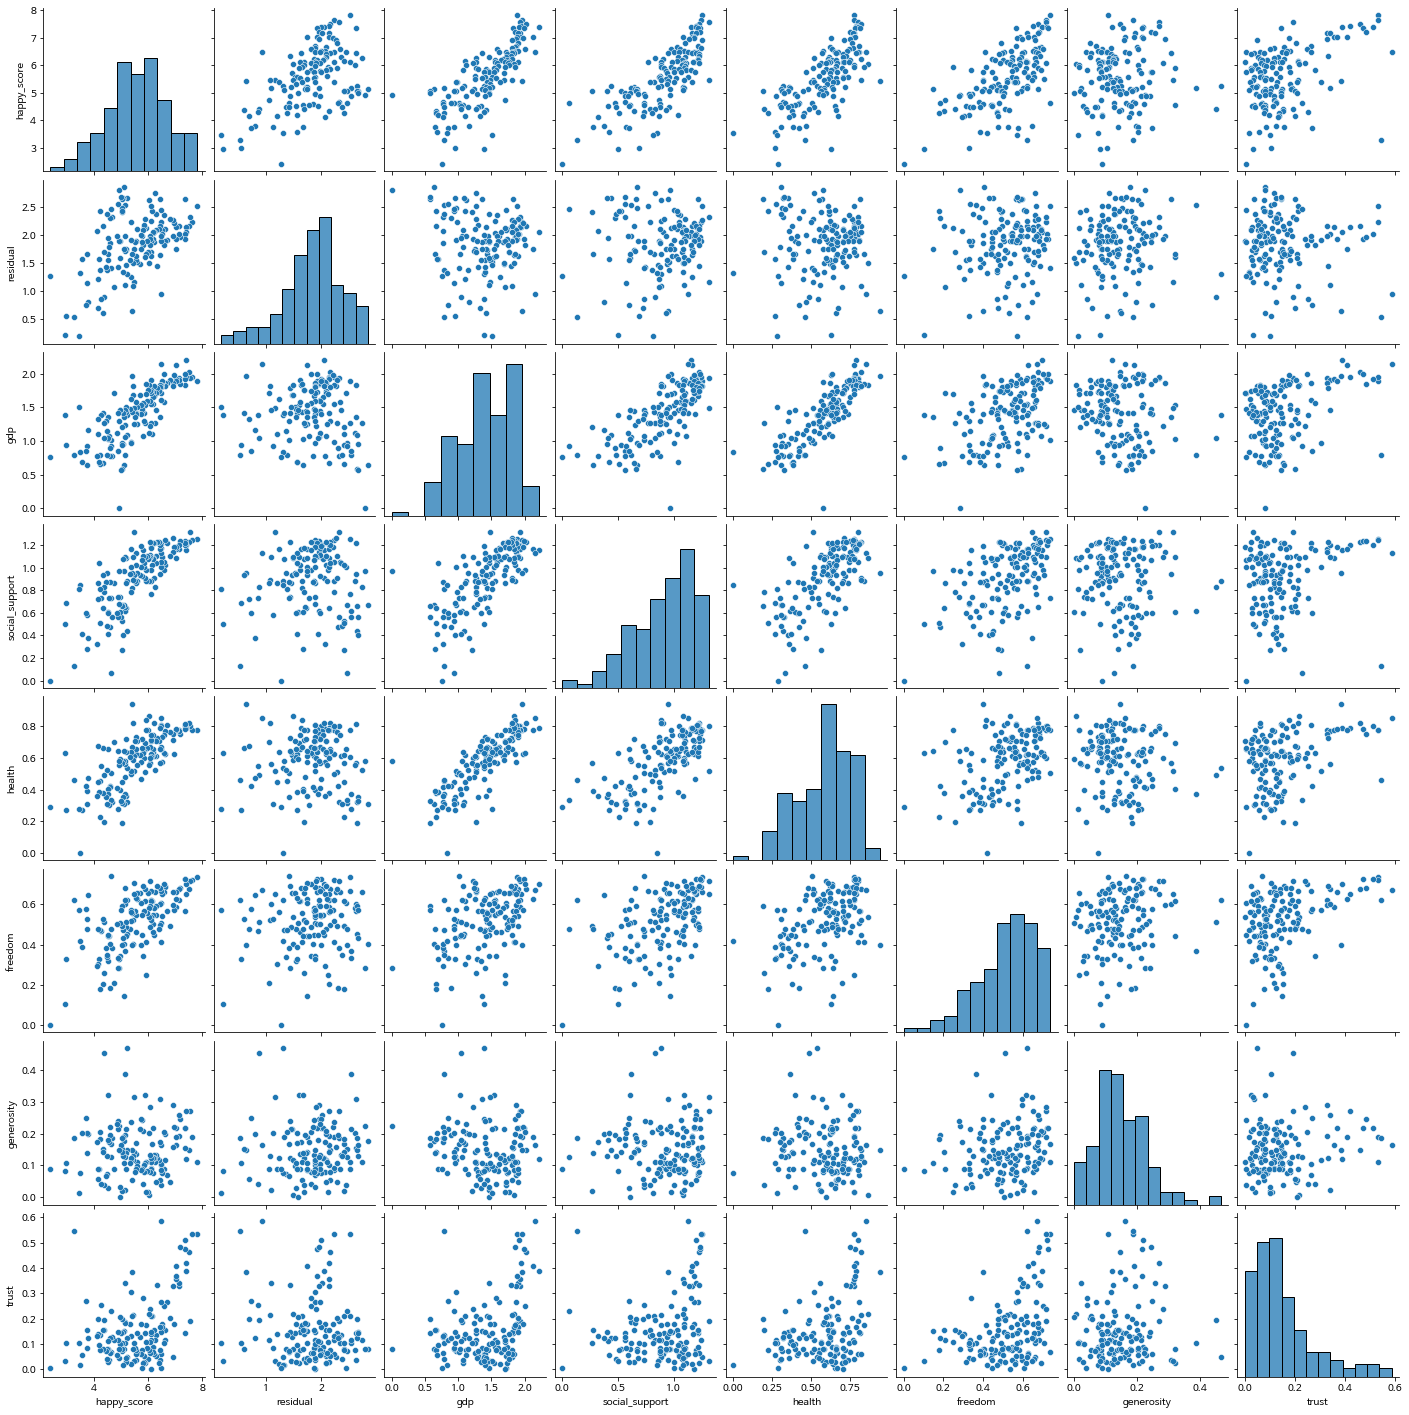

In [11]:
sns.pairplot(data3)
plt.show()

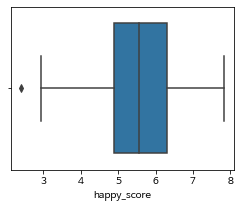

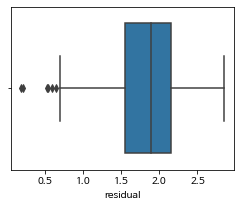

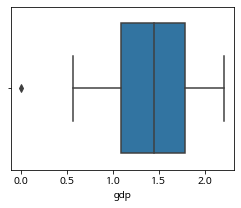

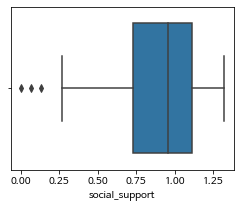

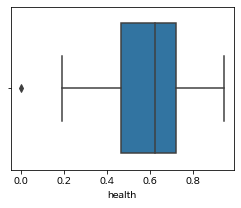

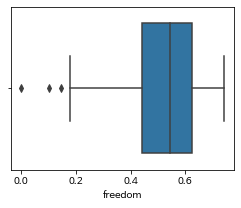

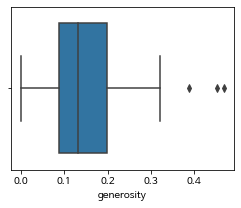

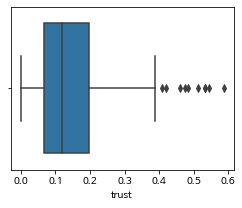

In [12]:
for c in data3.columns:
  plt.figure(figsize = (4,3))
  sns.boxplot(x=c, data=data3)
  plt.show()

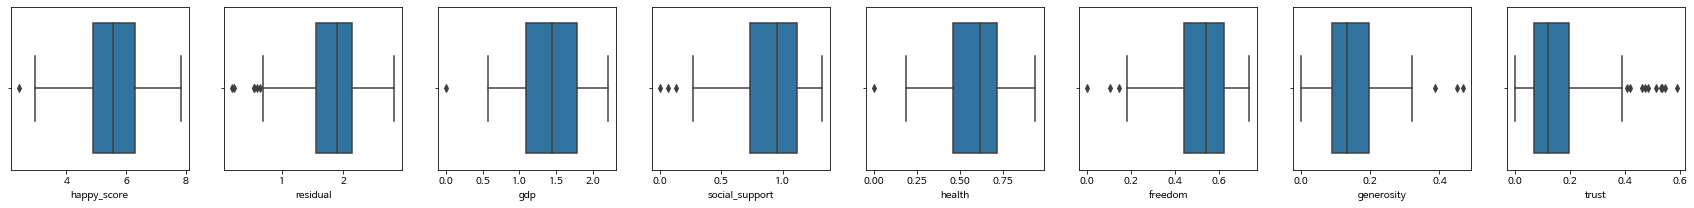

In [13]:
plt.figure(figsize = (30, 3))
i = 1

for c in data3.columns:
  plt.subplot(1, len(data3.columns), i)
  i = i + 1
  sns.boxplot(x=c, data=data3)

plt.show()

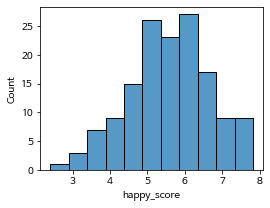

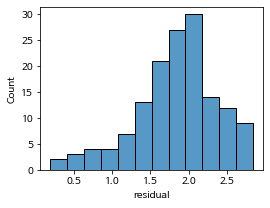

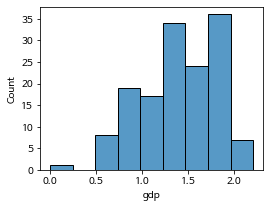

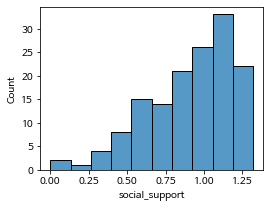

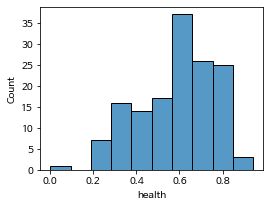

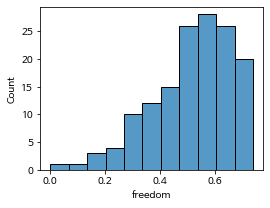

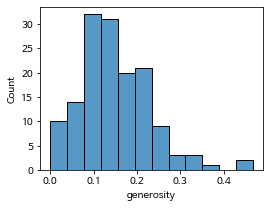

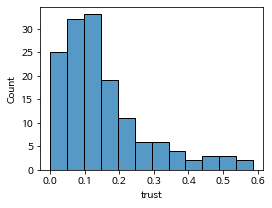

In [14]:
for c in data3.columns:
  plt.figure(figsize = (4, 3))
  sns.histplot(x=c, data = data3)
  plt.show()

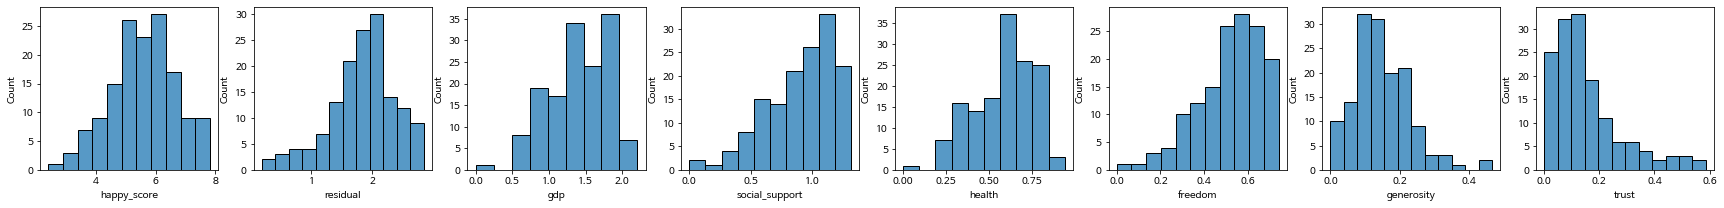

In [15]:
plt.figure(figsize = (30, 3))
i = 1

for c in data3.columns:
  plt.subplot(1, len(data3.columns), i)
  i = i + 1
  sns.histplot(x=c, data=data3)

plt.show()

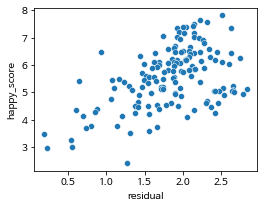

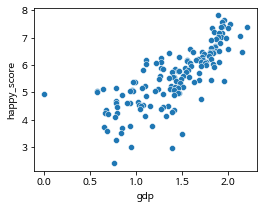

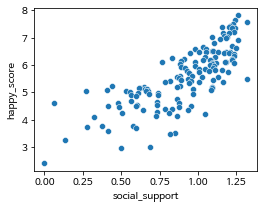

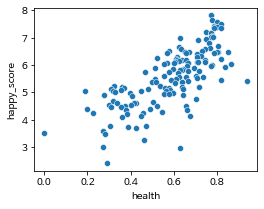

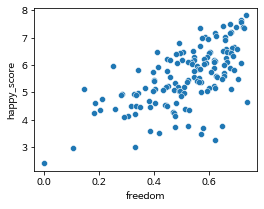

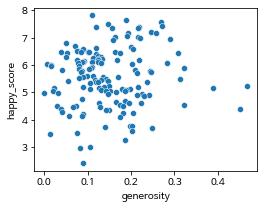

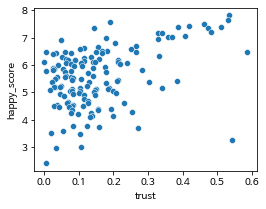

In [16]:
for c in data3.columns:
  if c != 'happy_score':
    plt.figure(figsize=(4,3))
    sns.scatterplot(x=c, y='happy_score', data=data3)
    plt.show()

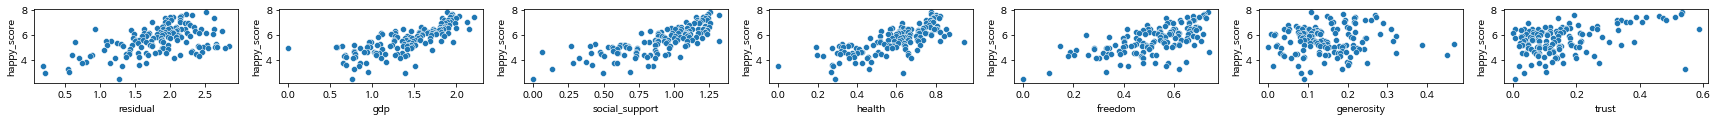

In [17]:
plt.figure(figsize = (30, 3))
i = 1

for c in data3.columns:
  if c != 'happy_score':
    plt.subplot(2, len(data3.columns) - 1, i)
    i = i + 1
    sns.scatterplot(x=c, y='happy_score', data=data3)
plt.show()

In [18]:
corr_res = data3.corr()
print(corr_res)

                happy_score  residual       gdp  social_support    health   freedom  generosity     trust
happy_score        1.000000  0.498990  0.763677        0.777889  0.740260  0.624822    0.063785  0.416216
residual           0.498990  1.000000 -0.073423        0.083606 -0.006886  0.117695    0.066915 -0.051075
gdp                0.763677 -0.073423  1.000000        0.722421  0.815386  0.458591   -0.164472  0.377589
social_support     0.777889  0.083606  0.722421        1.000000  0.666760  0.480466   -0.002339  0.223352
health             0.740260 -0.006886  0.815386        0.666760  1.000000  0.433166   -0.098133  0.362626
freedom            0.624822  0.117695  0.458591        0.480466  0.433166  1.000000    0.176800  0.402474
generosity         0.063785  0.066915 -0.164472       -0.002339 -0.098133  0.176800    1.000000  0.096107
trust              0.416216 -0.051075  0.377589        0.223352  0.362626  0.402474    0.096107  1.000000


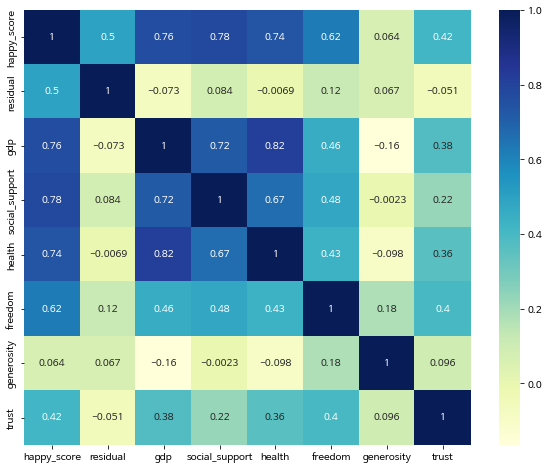

In [19]:
plt.figure(figsize =(10, 8))
sns.heatmap(corr_res, annot=True, cmap ='YlGnBu')
plt.show()

happy_score       1.000000
residual          0.498990
gdp               0.763677
social_support    0.777889
health            0.740260
freedom           0.624822
generosity        0.063785
trust             0.416216
Name: happy_score, dtype: float64


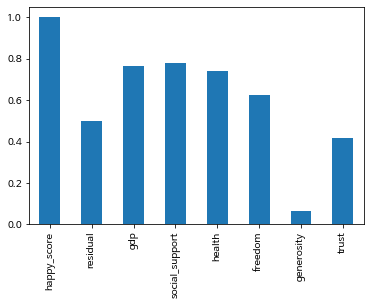

In [20]:
print(corr_res.loc['happy_score'])
corr_res.loc['happy_score'].plot.bar()
plt.show()

In [28]:
print(data3.shape[0])

h_border = data3.iloc[int(data3.shape[0]/3)]['happy_score']
m_border = data3.iloc[int((data3.shape[0]/3)) * 2]['happy_score']
print(h_border, m_border)

def group_rank(x):
  if x >= h_border:
    return 'H'
  elif x >= m_border:
    return 'M'
  else:
    return 'L'

data3['group_rank'] = data3['happy_score'].apply(group_rank)

146
6.12 5.122


In [29]:
data3

,happy_score,residual,gdp,social_support,health,freedom,generosity,trust,group_rank
0,7.821,2.518,1.892,1.258,0.775,0.736,0.109,0.534,H
1,7.636,2.226,1.953,1.243,0.777,0.719,0.188,0.532,H
2,7.557,2.320,1.936,1.320,0.803,0.718,0.270,0.191,H
3,7.512,2.153,2.026,1.226,0.822,0.677,0.147,0.461,H
4,7.415,2.137,1.945,1.206,0.787,0.651,0.271,0.419,H
...,...,...,...,...,...,...,...,...,...
141,3.471,0.187,1.503,0.815,0.280,0.571,0.012,0.102,L
142,3.268,0.536,0.785,0.133,0.462,0.621,0.187,0.544,L
143,2.995,0.548,0.947,0.690,0.270,0.329,0.106,0.105,L
144,2.955,0.216,1.392,0.498,0.631,0.103,0.082,0.034,L


In [30]:
data3.groupby('group_rank').mean().sort_values('happy_score', ascending=False)

,happy_score,residual,gdp,social_support,health,freedom,generosity,trust
group_rank,,,,,,,,
H,6.711204,2.080980,1.789449,1.131143,0.721816,0.612204,0.149531,0.226163
M,5.597313,1.789542,1.428333,0.960167,0.619542,0.535229,0.145750,0.118813
L,4.353102,1.624041,1.013918,0.627388,0.417837,0.404612,0.146816,0.118633


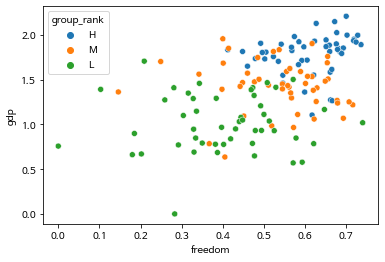

In [31]:
sns.scatterplot(x ='freedom', y = 'gdp', hue='group_rank', data = data3)
plt.show()

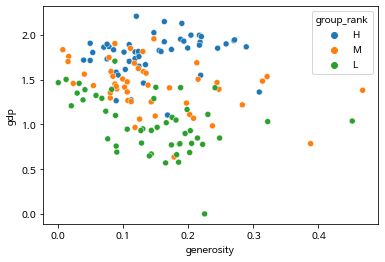

In [32]:
sns.scatterplot(x ='generosity', y = 'gdp', hue='group_rank', data = data3)
plt.show()

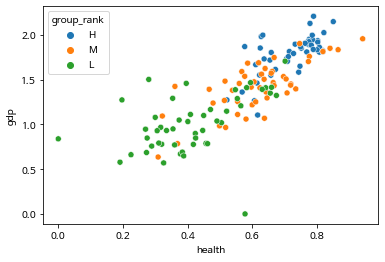

In [33]:
sns.scatterplot(x ='health', y = 'gdp', hue='group_rank', data = data3)
plt.show()

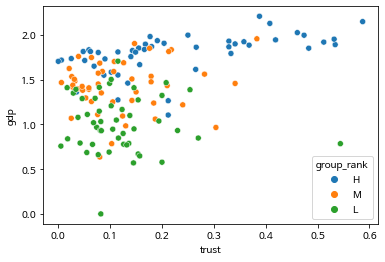

In [34]:
sns.scatterplot(x ='trust', y = 'gdp', hue='group_rank', data = data3)
plt.show()